In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sb
import numpy as np
from datetime import datetime, timedelta

In [3]:
# Change path
sataut = gpd.read_file("./data/satskred/SHP_merge/AvalDet_aut_Merge.shp")

sataut["t_0"] = pd.to_datetime(sataut["t_0"])
sataut["t_1"] = pd.to_datetime(sataut["t_1"])

In [3]:
sataut.to_excel("sataut.xlsx")

In [4]:
print(sataut["geometry"])
print(sataut.crs)

0     POLYGON ((8.20802 61.24034, 8.20793 61.24078, ...
1     POLYGON ((8.20272 61.24584, 8.20268 61.24601, ...
2     POLYGON ((8.20247 61.25988, 8.20245 61.25997, ...
3     POLYGON ((8.23335 61.22088, 8.23333 61.22097, ...
4     POLYGON ((8.21541 61.23557, 8.21535 61.23584, ...
                            ...                        
63    POLYGON ((8.23063 61.22831, 8.23057 61.22858, ...
64    POLYGON ((8.20045 61.26402, 8.20040 61.26428, ...
65    POLYGON ((8.19905 61.27134, 8.19901 61.27151, ...
66    POLYGON ((8.23144 61.22367, 8.23142 61.22376, ...
67    POLYGON ((8.19518 61.25988, 8.19516 61.25996, ...
Name: geometry, Length: 68, dtype: geometry
{'init': 'epsg:4326'}


In [5]:
# Change path
satman = gpd.read_file("./data/satskred/satman_latlon/AvalDet_man_Merge_latlon.shp")

satman["d"] = pd.to_datetime(satman["Date"])

In [6]:
satman.to_excel("satman.xlsx")

In [6]:
print(satman["geometry"])
print(satman.crs)

0     POLYGON ((8.19865 61.25974, 8.19978 61.25930, ...
1     POLYGON ((8.20018 61.25161, 8.19974 61.25216, ...
2     POLYGON ((8.20895 61.24004, 8.20938 61.24021, ...
3     POLYGON ((8.19712 61.26058, 8.19865 61.26046, ...
4     POLYGON ((8.19666 61.26563, 8.19813 61.26543, ...
                            ...                        
94    POLYGON ((8.19610 61.26858, 8.19697 61.26821, ...
95    POLYGON ((8.20226 61.24459, 8.20349 61.24473, ...
96    POLYGON ((8.19702 61.26108, 8.19855 61.26096, ...
97    POLYGON ((8.20043 61.25083, 8.20199 61.25091, ...
98    POLYGON ((8.19794 61.26082, 8.19939 61.26070, ...
Name: geometry, Length: 99, dtype: geometry
{'init': 'epsg:4326'}


In [7]:
sat_gdf = sataut.copy(deep=True) # makes the to dataframes independent, otherwise they are only referenced
wys_gdf = satman.copy(deep=True)

In [10]:
wys_to_sat = {} #empty dictionary
match_dict = {}

for w_row in wys_gdf.itertuples():
    sat_rows = sat_gdf[(sat_gdf["t_0"] <= w_row.d) & (w_row.d <= sat_gdf["t_1"])]
    if len(sat_rows) == 0:
        wys_to_sat[w_row.Index] = "No match"
    else:
        wys_to_sat[w_row.Index] = sat_rows.index
        for i in sat_rows.index:
            _s = sat_gdf['geometry'].iloc[i]
            _w = wys_gdf['geometry'].iloc[w_row.Index]
            if _s.intersects(_w):
                try:
                    match_dict[w_row.Index].append(i)
                except KeyError:
                    match_dict[w_row.Index] = [i]
%print(match_dict) 

{0: Int64Index([32, 33], dtype='int64'), 1: Int64Index([32, 33], dtype='int64'), 2: 'No match', 3: 'No match', 4: 'No match', 5: 'No match', 6: 'No match', 7: 'No match', 8: 'No match', 9: 'No match', 10: Int64Index([0, 1, 2], dtype='int64'), 11: Int64Index([0, 1, 2], dtype='int64'), 12: Int64Index([0, 1, 2], dtype='int64'), 13: Int64Index([0, 1, 2], dtype='int64'), 14: Int64Index([0, 1, 2], dtype='int64'), 15: Int64Index([0, 1, 2], dtype='int64'), 16: Int64Index([0, 1, 2], dtype='int64'), 17: Int64Index([0, 1, 2], dtype='int64'), 18: Int64Index([0, 1, 2], dtype='int64'), 19: Int64Index([0, 1, 2], dtype='int64'), 20: Int64Index([0, 1, 2], dtype='int64'), 21: Int64Index([3], dtype='int64'), 22: Int64Index([4, 5, 6, 7], dtype='int64'), 23: Int64Index([4, 5, 6, 7], dtype='int64'), 24: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='int64'), 25: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='int64'), 26: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='int64'), 27: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='

UsageError: Line magic function `%print(match_dict)` not found.


In [11]:
print(wys_to_sat)

{0: Int64Index([32, 33], dtype='int64'), 1: Int64Index([32, 33], dtype='int64'), 2: 'No match', 3: 'No match', 4: 'No match', 5: 'No match', 6: 'No match', 7: 'No match', 8: 'No match', 9: 'No match', 10: Int64Index([0, 1, 2], dtype='int64'), 11: Int64Index([0, 1, 2], dtype='int64'), 12: Int64Index([0, 1, 2], dtype='int64'), 13: Int64Index([0, 1, 2], dtype='int64'), 14: Int64Index([0, 1, 2], dtype='int64'), 15: Int64Index([0, 1, 2], dtype='int64'), 16: Int64Index([0, 1, 2], dtype='int64'), 17: Int64Index([0, 1, 2], dtype='int64'), 18: Int64Index([0, 1, 2], dtype='int64'), 19: Int64Index([0, 1, 2], dtype='int64'), 20: Int64Index([0, 1, 2], dtype='int64'), 21: Int64Index([3], dtype='int64'), 22: Int64Index([4, 5, 6, 7], dtype='int64'), 23: Int64Index([4, 5, 6, 7], dtype='int64'), 24: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='int64'), 25: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='int64'), 26: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='int64'), 27: Int64Index([4, 5, 6, 7, 8, 9, 10], dtype='

10 2019-02-13 00:00:00 [0]
11 2019-02-13 00:00:00 [2]
25 2019-03-27 00:00:00 [6]
27 2019-03-27 00:00:00 [7]
29 2019-03-27 00:00:00 [4, 5]
67 2016-12-31 00:00:00 [44, 46]
68 2017-01-01 00:00:00 [45, 47]
70 2017-01-31 00:00:00 [48]
81 2017-03-13 00:00:00 [53]
83 2017-03-25 00:00:00 [53]
86 2017-03-25 00:00:00 [54]
96 2017-04-25 00:00:00 [58]


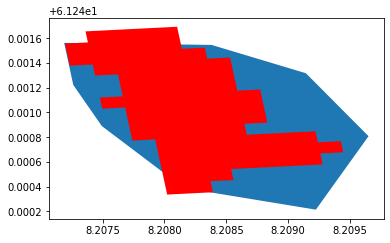

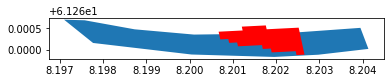

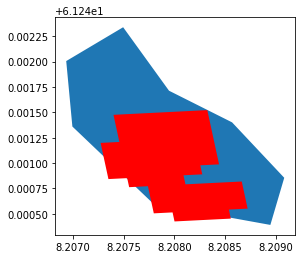

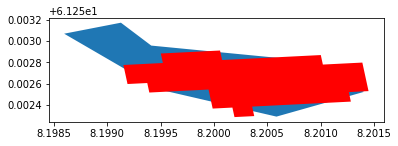

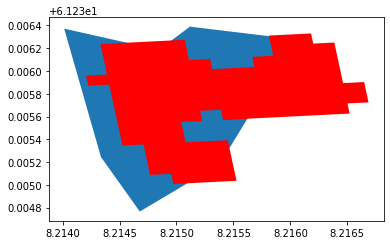

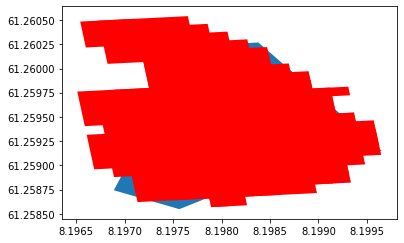

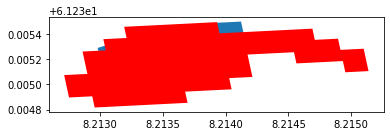

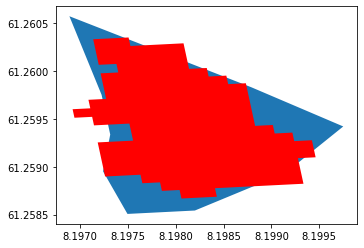

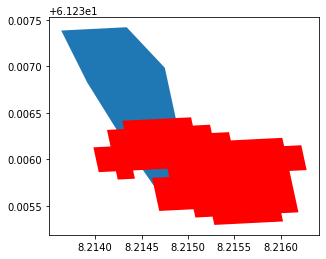

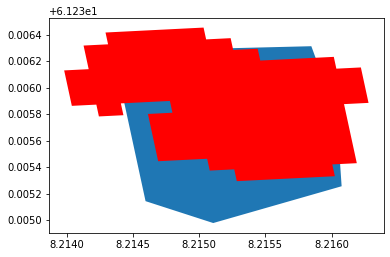

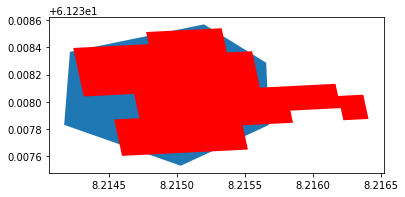

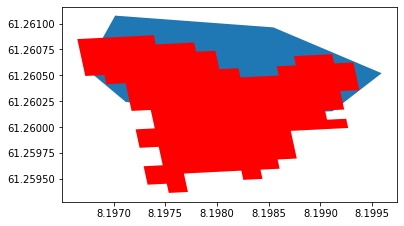

In [21]:
#print(str(match_dict[55]))
for k in match_dict.keys():
    print(k, wys_gdf['d'].iloc[k], match_dict[k])
    ax = wys_gdf.iloc[[k]].plot()
    sat_gdf.iloc[match_dict[k]].plot(ax=ax, color='r')
    plt.gcf().savefig('match_satman{0}_sataut{1}.png'.format(k, str(match_dict[k])))
